In [40]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [41]:
#Load the dataset
df1=pd.read_csv("loan_data.csv")
df1.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [42]:
#Check the values of the target variable
x=df1['not.fully.paid'].value_counts()

In [43]:
x[0]/df1.shape[0]*100 #The data is highly imbalanced

83.99457089162664

In [44]:
df1.shape

(9578, 14)

In [45]:
df1['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [46]:
#1.Feature Transformation:
    #Transform categorical values into numerical values (discrete)

df1['purpose'].replace(['debt_consolidation', 'all_other','credit_card','home_improvement','small_business','major_purchase','educational'],
                        [0, 1,2,3,4,5,6], inplace=True)

In [47]:
df1.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,2,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,0,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,0,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,2,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [48]:
df1['purpose'].value_counts()

0    3957
1    2331
2    1262
3     629
4     619
5     437
6     343
Name: purpose, dtype: int64

In [49]:
#2.Exploratory data analysis of different factors of the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   int64  
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(8)
memory usage: 1.0 MB


In [50]:
df1.describe()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,1.405408,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,1.688329,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,6.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [51]:
df1.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [52]:
#Normalize the columns 'days.with.cr.line' & 'revol.bal'
def mean_normalize(series):
    norm_series=(series-series.mean())/(series.max()-series.min())
    return norm_series

In [53]:
norm_df=df1.iloc[:,2:-1].apply(mean_normalize,axis=1)
norm_df.head()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,-0.113870,-0.085140,-0.113481,-0.113199,-0.088332,0.081591,0.886125,-0.112069,-0.113875,-0.113875,-0.113875
1,-0.101173,-0.094389,-0.100847,-0.100751,-0.080149,-0.019090,0.898824,-0.098895,-0.101176,-0.101176,-0.101176
2,-0.179832,-0.101971,-0.177659,-0.177392,-0.035063,0.820139,0.565574,-0.174426,-0.179649,-0.179861,-0.179861
3,-0.100811,-0.095992,-0.100477,-0.100573,-0.079665,-0.020618,0.899186,-0.098639,-0.100784,-0.100814,-0.100814
4,-0.184911,-0.163228,-0.182557,-0.181783,-0.044224,0.672865,0.815059,-0.176608,-0.184941,-0.184730,-0.184941


In [54]:
df1=df1.drop(columns=['int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec'],axis=1)


In [55]:
df=pd.concat((df1,norm_df),axis=1)
df.head()

,credit.policy,purpose,not.fully.paid,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1,0,0,-0.113870,-0.085140,-0.113481,-0.113199,-0.088332,0.081591,0.886125,-0.112069,-0.113875,-0.113875,-0.113875
1,1,2,0,-0.101173,-0.094389,-0.100847,-0.100751,-0.080149,-0.019090,0.898824,-0.098895,-0.101176,-0.101176,-0.101176
2,1,0,0,-0.179832,-0.101971,-0.177659,-0.177392,-0.035063,0.820139,0.565574,-0.174426,-0.179649,-0.179861,-0.179861
3,1,0,0,-0.100811,-0.095992,-0.100477,-0.100573,-0.079665,-0.020618,0.899186,-0.098639,-0.100784,-0.100814,-0.100814
4,1,2,0,-0.184911,-0.163228,-0.182557,-0.181783,-0.044224,0.672865,0.815059,-0.176608,-0.184941,-0.184730,-0.184941


In [56]:
print(round(100*(df.isnull().sum()/len(df.index)),2))

credit.policy        0.0
purpose              0.0
not.fully.paid       0.0
int.rate             0.0
installment          0.0
log.annual.inc       0.0
dti                  0.0
fico                 0.0
days.with.cr.line    0.0
revol.bal            0.0
revol.util           0.0
inq.last.6mths       0.0
delinq.2yrs          0.0
pub.rec              0.0
dtype: float64


In [57]:
#3.check the correlation between features and will drop those features which have a strong correlation

corr_df=df.corr()
corr_df

,credit.policy,purpose,not.fully.paid,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
credit.policy,1.000000,-0.010254,-0.158119,-0.004714,-0.075219,-0.015807,-0.013144,-0.180635,0.095632,-0.011903,-0.055899,-0.012995,-0.004832,-0.004628
purpose,-0.010254,1.000000,0.032470,-0.069237,0.071474,-0.062690,-0.069255,0.152432,0.155932,-0.181805,-0.076087,-0.067657,-0.069265,-0.069317
not.fully.paid,-0.158119,0.032470,1.000000,0.013554,0.056793,0.015333,0.016124,0.020951,-0.036812,0.011303,0.030732,0.015678,0.013554,0.013572
int.rate,-0.004714,-0.069237,0.013554,1.000000,0.101539,0.998773,0.997953,-0.456445,-0.592793,0.102029,0.965229,0.999748,0.999992,0.999999
installment,-0.075219,0.071474,0.056793,0.101539,1.000000,0.126619,0.109308,0.377488,0.000513,-0.351853,0.101913,0.107986,0.101386,0.101211
log.annual.inc,-0.015807,-0.062690,0.015333,0.998773,0.126619,1.000000,0.998138,-0.412218,-0.585475,0.074646,0.968420,0.999007,0.998757,0.998742
dti,-0.013144,-0.069255,0.016124,0.997953,0.109308,0.998138,1.000000,-0.430258,-0.587409,0.086084,0.968167,0.998039,0.997940,0.997932
fico,-0.180635,0.152432,0.020951,-0.456445,0.377488,-0.412218,-0.430258,1.000000,0.394283,-0.539723,-0.367502,-0.448162,-0.456646,-0.456975
days.with.cr.line,0.095632,0.155932,-0.036812,-0.592793,0.000513,-0.585475,-0.587409,0.394283,1.000000,-0.785747,-0.611967,-0.592091,-0.592367,-0.592715
revol.bal,-0.011903,-0.181805,0.011303,0.102029,-0.351853,0.074646,0.086084,-0.539723,-0.785747,1.000000,0.105327,0.097290,0.101693,0.102200


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

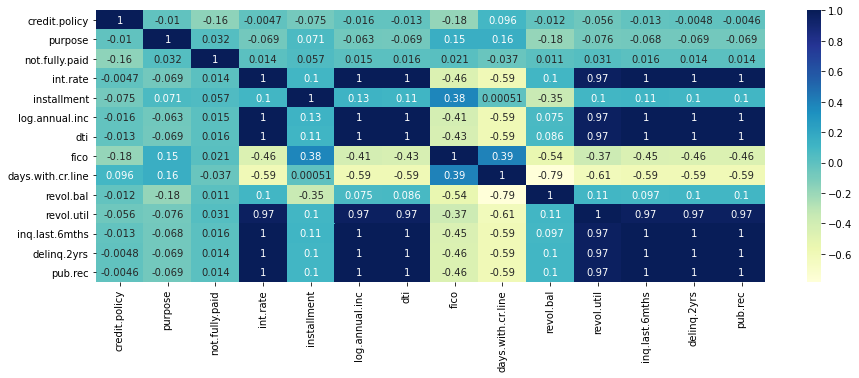

In [59]:
plt.figure(figsize=(15,5))
sns.heatmap(data=corr_df,annot=True,cmap='YlGnBu')
plt.show()

In [60]:

row_index = 0
corrDict = {}
row_name = []
col_name = []
corr_val = []

while row_index < len(df.corr().index.tolist()):
    for index, x in enumerate(df.corr().iloc[row_index, :]):
        if abs(x) >= 0.8 and index != row_index:
            if abs(x) in corr_val:
                if (df.corr().index.tolist()[row_index] in col_name) and (df.corr().columns.tolist()[index] in row_name):
                    continue
            row_name.append(df.corr().index.tolist()[row_index])
            col_name.append(df.corr().columns.tolist()[index])
            corr_val.append(x)
    row_index += 1
    
corrDict ={"First Feature (FF)": row_name, "Second Feature (SF)": col_name, "Correlation (FF x SF)": corr_val}
corr_df2=pd.DataFrame(corrDict)
corr_df2


,First Feature (FF),Second Feature (SF),Correlation (FF x SF)
0,int.rate,log.annual.inc,0.998773
1,int.rate,dti,0.997953
2,int.rate,revol.util,0.965229
3,int.rate,inq.last.6mths,0.999748
4,int.rate,delinq.2yrs,0.999992
5,int.rate,pub.rec,0.999999
6,log.annual.inc,dti,0.998138
7,log.annual.inc,revol.util,0.968420
8,log.annual.inc,inq.last.6mths,0.999007
9,log.annual.inc,delinq.2yrs,0.998757


In [61]:
df=df.drop(columns=['log.annual.inc',
       'dti', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec'],axis=1)


In [62]:
df.shape

(9578, 8)

In [63]:
corr=df.corr()
corr

,credit.policy,purpose,not.fully.paid,int.rate,installment,fico,days.with.cr.line,revol.bal
credit.policy,1.000000,-0.010254,-0.158119,-0.004714,-0.075219,-0.180635,0.095632,-0.011903
purpose,-0.010254,1.000000,0.032470,-0.069237,0.071474,0.152432,0.155932,-0.181805
not.fully.paid,-0.158119,0.032470,1.000000,0.013554,0.056793,0.020951,-0.036812,0.011303
int.rate,-0.004714,-0.069237,0.013554,1.000000,0.101539,-0.456445,-0.592793,0.102029
installment,-0.075219,0.071474,0.056793,0.101539,1.000000,0.377488,0.000513,-0.351853
fico,-0.180635,0.152432,0.020951,-0.456445,0.377488,1.000000,0.394283,-0.539723
days.with.cr.line,0.095632,0.155932,-0.036812,-0.592793,0.000513,0.394283,1.000000,-0.785747
revol.bal,-0.011903,-0.181805,0.011303,0.102029,-0.351853,-0.539723,-0.785747,1.000000


In [64]:
from sklearn.model_selection import train_test_split

y=df['not.fully.paid']
X=df.drop(columns=['not.fully.paid'],axis=1)

In [65]:
print(X.shape,y.shape)

(9578, 7) (9578,)


In [66]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=101)

In [67]:
print("Shape of xtrain=",xtrain.shape,"\nShape of ytrain=",ytrain.shape)
print("Shape of xtest=",xtest.shape,"\nShape of ytest=",ytest.shape)

Shape of xtrain= (7662, 7) 
Shape of ytrain= (7662,)
Shape of xtest= (1916, 7) 
Shape of ytest= (1916,)


In [68]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [69]:
xtrain_smote,ytrain_smote=sm.fit_resample(xtrain,ytrain)

In [70]:
from collections import Counter
print('Before smote:',Counter(ytrain))
print('After smote:',Counter(ytrain_smote))

Before smote: Counter({0: 6422, 1: 1240})
After smote: Counter({0: 6422, 1: 6422})


In [74]:
#MODEL ARCHITECTURE
import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout


In [75]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((7,),input_shape=(7,)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dropout(0.2))

In [76]:
#First hidden layer
model.add(tf.keras.layers.Dense(250,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dropout(0.2))

In [77]:
#Second hidden layer
model.add(tf.keras.layers.Dense(150,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dropout(0.2))

In [78]:
#Third hidden layer
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dropout(0.2))

In [79]:
#Fourth hidden layer
model.add(tf.keras.layers.Dense(250,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dropout(0.2))

In [80]:
#Output layer
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [83]:
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=sgd_optimizer, loss='binary_crossentropy',metrics=['accuracy'])

In [84]:
import warnings
warnings.filterwarnings('ignore')

In [86]:
#Training the model
model.fit(xtrain_smote,ytrain_smote,
          validation_data=(xtest,ytest),
          epochs=10,
          batch_size=32)
score = model.evaluate(xtest, ytest, verbose=0)

Epoch 1/10
402/402 [==============================] - 2s 5ms/step - loss: 0.6907 - accuracy: 0.5582 - val_loss: 0.6603 - val_accuracy: 0.7192
Epoch 2/10
402/402 [==============================] - 2s 5ms/step - loss: 0.6862 - accuracy: 0.5617 - val_loss: 0.6663 - val_accuracy: 0.7213
Epoch 3/10
402/402 [==============================] - 2s 5ms/step - loss: 0.6898 - accuracy: 0.5613 - val_loss: 0.6586 - val_accuracy: 0.7239
Epoch 4/10
402/402 [==============================] - 2s 5ms/step - loss: 0.6867 - accuracy: 0.5628 - val_loss: 0.6555 - val_accuracy: 0.7229
Epoch 5/10
402/402 [==============================] - 2s 6ms/step - loss: 0.6841 - accuracy: 0.5694 - val_loss: 0.6575 - val_accuracy: 0.7249
Epoch 6/10
402/402 [==============================] - 2s 5ms/step - loss: 0.6865 - accuracy: 0.5642 - val_loss: 0.6565 - val_accuracy: 0.7192
Epoch 7/10
402/402 [==============================] - 2s 6ms/step - loss: 0.6837 - accuracy: 0.5656 - val_loss: 0.6525 - val_accuracy: 0.7218
Epoch 

In [87]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6596884727478027
Test accuracy: 0.7244259119033813
